# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

# Imports

In [1]:
# install imutils for image transformations and the gpyopt for Bayesian Optimization
!pip install imutils
!pip install gpyopt

  Running setup.py bdist_wheel for imutils ... done
  Stored in directory: /root/.cache/pip/wheels/16/84/1f/bf88641293cda2c8be81a5c4b8ca973dd9125a6dc3767417fd
Successfully built imutils
    100% |████████████████████████████████| 61kB 2.7MB/s ta 0:00:011
    100% |████████████████████████████████| 1.0MB 12.0MB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 23.3MB/s ta 0:00:01
  Running setup.py bdist_wheel for gpyopt ... done
  Stored in directory: /root/.cache/pip/wheels/b2/00/69/cfa967a125cf25e66f644be6193ad6f0edf231147879ad714f
  Running setup.py bdist_wheel for GPy ... done
  Stored in directory: /root/.cache/pip/wheels/5d/36/66/2b58860c84c9f2b51615da66bfd6feeddbc4e04d887ff96dfa
  Running setup.py bdist_wheel for paramz ... done
  Stored in directory: /root/.cache/pip/wheels/c8/4a/0e/6e0dc85541825f991c431619e25b870d4b812c911214690cf8
Successfully built gpyopt GPy paramz


In [12]:
import pickle
import cv2
import pandas as pd
from sklearn.utils import shuffle
import random
import imutils
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from GPyOpt.methods import BayesianOptimization
%matplotlib inline

---
## Step 0: Load The Data

In [13]:
# Load pickled data

# TODO: Fill this in based on where you saved the training and testing data
DATA_PATH = "/home/workspace/data/"
training_file = DATA_PATH + "train.p"
validation_file=DATA_PATH + "valid.p"
testing_file = DATA_PATH + "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [10]:
#load signs id and description list
sign_names = pd.read_csv("signnames.csv")
sign_names.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [43]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image = X_train[0].squeeze()
image_shape = image.shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(sign_names)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of unique classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of unique classes = 43


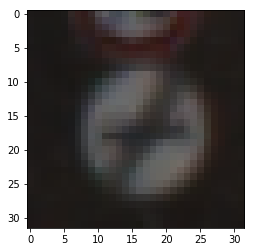

In [6]:
plt.imshow(image)

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

# Visualize Data

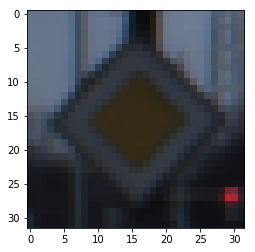

Priority road


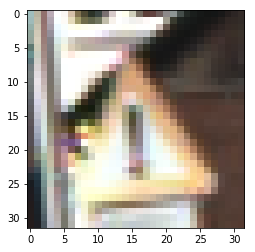

General caution


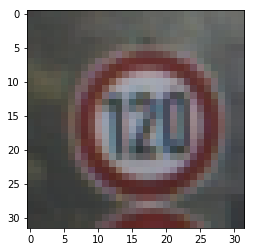

Speed limit (120km/h)


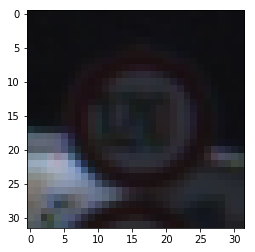

Speed limit (120km/h)


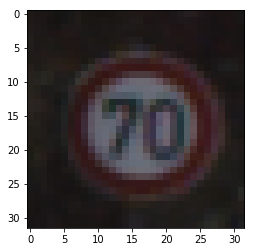

Speed limit (70km/h)


In [8]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

for i in range(5):
    index = random.randint(0, len(X_train)-1)
    image = X_train[index].squeeze()

    plt.figure(figsize=(4,4))
    plt.imshow(image)
    plt.show()
    print(sign_names[sign_names["ClassId"]==y_train[index]]["SignName"].values[0])

### Classes are imbalanced!

In [6]:
y_train_val = np.concatenate((y_train,y_test),axis=0)
y_train.shape,y_test.shape,y_train_val.shape

((34799,), (12630,), (47429,))

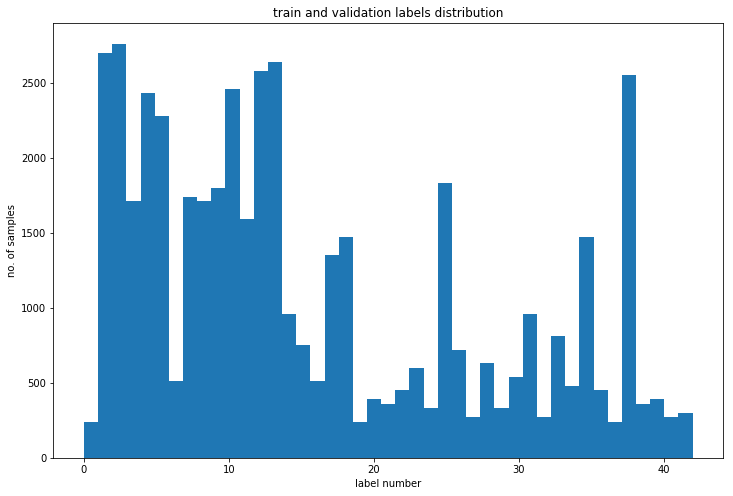

In [7]:
# observe classes distribution
plt.figure(figsize=(12,8))
bin_arrays,_,_=plt.hist(y_train_val,bins=n_classes)
plt.title("train and validation labels distribution")
plt.xlabel("label number")
plt.ylabel("no. of samples")
plt.show()

In [8]:
# The median count per class
median_class_count = np.median(bin_arrays)
median_class_count

720.0

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [9]:
labels = list(sign_names["ClassId"].values)
len(labels)

43

## Augment the training dataset

In [10]:
def hflip(img):
    return cv2.flip(img, 1)

def random_rotation(img):
    angle = np.random.randint(0,360)
    return imutils.rotate(img, angle=angle)

def random_translation(img):
    randx = np.random.randint(-5,5)
    randy = np.random.randint(-5,5)
    return imutils.translate(img, randx, randy)

def augment(image_list):
    img_idx = index = np.random.randint(0, len(image_list))
    img = image_list[img_idx]
    select = np.random.randint(1,3)
    if select == 1:
        new_image = hflip(img)
    elif select == 2:
        new_image = random_rotation(img)
    else:
        new_image = random_translation(img)
    return new_image
    
def unskew_classes(Xset,yset,labels,minval): 
    X_aug=Xset.copy()
    y_aug=yset.copy()
    for label in labels:
        label_images = Xset[yset==label]
        num_label_images = len(label_images)
        added_y = 0
        # augment if class images are less than the median class count
        if num_label_images != 0:
            while num_label_images < minval:
                new_img = np.expand_dims(augment(label_images),axis=0)
                X_aug=np.concatenate((X_aug,new_img),axis=0)
                num_label_images +=1
                added_y+=1
            y_aug = np.append(y_aug,np.ones(added_y)*label)
        else:
            print("label {} has no images".format(label))
    return X_aug,y_aug

original image
29530


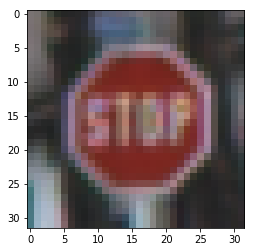

In [17]:
print("original image")
index = random.randint(0, len(X_train)-1)
image = X_train[index]
print(index)
plt.imshow(image)

augmented image


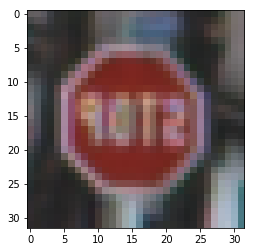

In [22]:
print("augmented image")
index = random.randint(0, len(X_train)-1)
augmented_image = augment([image])
plt.imshow(augmented_image)

In [14]:
# X1,y1 = unskew_classes(Xset=X_train,yset=y_train,labels=labels,minval=median_class_count)
# np.save("X_train_unskewed",X1)
# np.save("y_train_unskewed",y1)

In [11]:
X_train = np.load("X_train_unskewed.npy")
y_train = np.load("y_train_unskewed.npy")
print(X_train.shape,y_train.shape)

(44400, 32, 32, 3) (44400,)


### Training Data is no longer skewed!

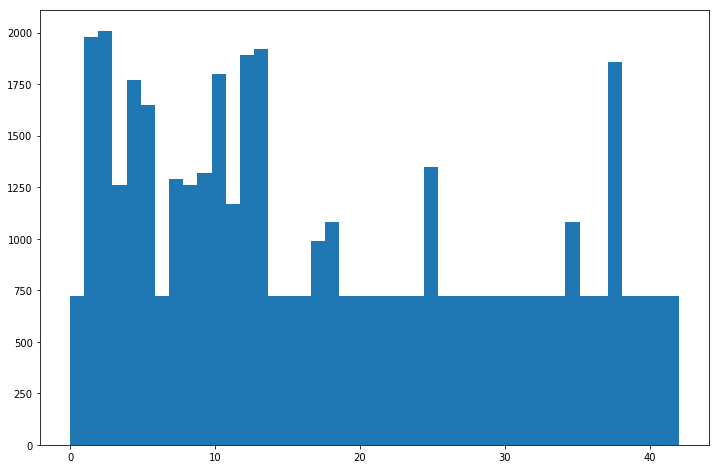

In [15]:
# observe classes distribution
plt.figure(figsize=(12,8))
bin_arrays,_,_=plt.hist(y_train,bins=n_classes)
plt.show()

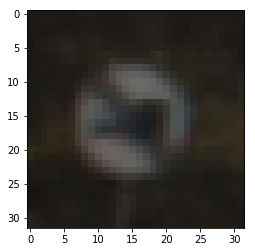

In [16]:
# verify one augmented sample
image=X_train[-1]
plt.imshow(image)

### Model Architecture

In [46]:
# Added Xavier initialization, input data normalization and dropout

def LeNetMod(inputX,keep,n_kernels1):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    inputX = (inputX-128)/128
    xinitializer = tf.contrib.layers.xavier_initializer()
    input_height = 32
    kernel_size1 = 5
    n_channels = 3
    strides1 = [1, 1, 1, 1]
    vpadding = 'VALID'
    P = 0
    pool1_ksize = [1,2,2,1]
    pool1_stride = [1,2,2,1]
    F_conv1 = tf.Variable(xinitializer([kernel_size1,kernel_size1,n_channels,n_kernels1]),name='F_conv1')
    b_conv1 = tf.Variable(xinitializer([n_kernels1]),name='b_conv1')
    new_height = (input_height - kernel_size1 + 2 * P)/strides1[1] + 1
    new_height = (new_height - pool1_ksize[1])/pool1_stride[1] + 1
    
    kernel_size2 = 5
    n_kernels2 = n_kernels1*4
    strides2 = [1, 1, 1, 1]
    pool2_ksize = [1,2,2,1]
    pool2_stride = [1,2,2,1]
    F_conv2 = tf.Variable(xinitializer([kernel_size2,kernel_size2,n_kernels1,n_kernels2]),name='F_conv2')
    b_conv2 = tf.Variable(xinitializer([n_kernels2]),name='b_conv2')
    new_height = (new_height - kernel_size2 + 2 * P)/strides2[1] + 1
    new_height = (new_height - pool2_ksize[1])/pool2_stride[1] + 1
    
    flat_size = int(new_height*new_height*n_kernels2)
    n_hidden_fc1 = int(flat_size//2)
    W_fc1 = tf.Variable(xinitializer([flat_size,n_hidden_fc1]),name='W_fc1')
    b_fc1 = tf.Variable(xinitializer([n_hidden_fc1]),name='b_fc1')         
    
    n_hidden_fc2 = int(n_hidden_fc1//4)
    W_fc2 = tf.Variable(xinitializer([n_hidden_fc1,n_hidden_fc2]),name='W_fc2')
    b_fc2 = tf.Variable(xinitializer([n_hidden_fc2]),name='b_fc2')
    
    n_hidden_fc3 = n_classes
    W_fc3 = tf.Variable(xinitializer([n_hidden_fc2,n_hidden_fc3]),name='W_fc2')
    b_fc3 = tf.Variable(xinitializer([n_hidden_fc3]),name='b_fc2')
    
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1 = tf.nn.conv2d(inputX,F_conv1,strides1,vpadding) + b_conv1
    # TODO: Activation.
    act1 = tf.nn.relu(conv1)
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    pool1 = tf.nn.max_pool(act1,pool1_ksize,pool1_stride,vpadding)
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2 = tf.nn.conv2d(pool1,F_conv2,strides2,vpadding) + b_conv2
    # TODO: Activation.
    act2 = tf.nn.relu(conv2)
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    pool2 = tf.nn.max_pool(act2,pool2_ksize,pool2_stride,vpadding)
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    flat = flatten(pool2)
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1 = tf.add(tf.matmul(flat, W_fc1), b_fc1)
    # TODO: Activation.
    act3 = tf.nn.relu(fc1)
    drop1 = tf.nn.dropout(act3,keep_prob=keep)
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = tf.add(tf.matmul(drop1, W_fc2), b_fc2)
    # TODO: Activation.
    act4 = tf.nn.relu(fc2)
    drop2 = tf.nn.dropout(act4,keep_prob=keep)
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    logits = tf.add(tf.matmul(drop2, W_fc3), b_fc3)
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

# Bayesian Optimization for hyperparameters

In [16]:
# objective function to optimize with hyperparameters

def train_function(hparams):
    global X_train,y_train,n_classes
    learning_rate = float(hparams[:,0])
    keep_prob = float(hparams[:,1])
    num_epochs = int(hparams[:,2])
    batch_size = int(hparams[:,3])
    num_kernels1 = int(hparams[:,4])
    
    print("lr: {}  keep_prob: {}  num_epochs: {}  batch_size: {}  num kernels conv1: {}".format(learning_rate,
                                                                                                keep_prob,
                                                                                                num_epochs,
                                                                                                batch_size,
                                                                                                num_kernels1))
    
    inputX = tf.placeholder(tf.float32, (None, 32, 32, 3))
    inputY = tf.placeholder(tf.int32, (None))
    keep = tf.placeholder(tf.float32)
    one_hot_y = tf.one_hot(inputY, n_classes)
    logits = LeNetMod(inputX,keep,num_kernels1)
    
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
    loss_operation = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
 
    training_operation = optimizer.minimize(loss_operation)
    
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)
    
        for i in range(num_epochs):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, batch_size):
                end = offset + batch_size
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={inputX: batch_x,
                                                        inputY: batch_y,
                                                        keep: keep_prob})

            num_examples = len(X_valid)
            total_accuracy = 0
            for offset in range(0, num_examples, batch_size):
                batch_x, batch_y = X_valid[offset:offset+batch_size], y_valid[offset:offset+batch_size]
                accuracy = sess.run(accuracy_operation, feed_dict={inputX: batch_x,
                                                                   inputY: batch_y,
                                                                   keep: 1.0})
                total_accuracy += (accuracy * len(batch_x))
            validation_accuracy =  total_accuracy / num_examples

    print("Final Validation Accuracy = {:.3f}".format(validation_accuracy))
    print()
    return validation_accuracy
    

In [17]:
# define hyperparameters domain
domain = [{'name': 'learning_rate', 'type': 'continuous', 'domain': (0.0001,0.001)},
          {'name': 'keep_prob', 'type': 'discrete', 'domain': (0.6,0.7,0.8,0.9,1.0)},
          {'name': 'num_epochs', 'type': 'discrete', 'domain': tuple(np.arange(30,101,10))},
          {'name': 'batch_size', 'type': 'discrete', 'domain': (32,64,128,256)},
          {'name': 'num_kernels1', 'type': 'discrete', 'domain': (6,10,14,18)},
         ]

# Optimize hyperparameters
myBopt = BayesianOptimization(f=train_function, domain=domain,maximize=True)
myBopt.run_optimization(max_iter=50)

lr: 0.0006277515095252316  keep_prob: 0.6  num_epochs: 60  batch_size: 256  num kernels conv1: 10
Final Validation Accuracy = 0.916

lr: 0.0007424662225412701  keep_prob: 0.7  num_epochs: 30  batch_size: 64  num kernels conv1: 18
Final Validation Accuracy = 0.910

lr: 0.0005619976113737659  keep_prob: 0.7  num_epochs: 70  batch_size: 64  num kernels conv1: 10
Final Validation Accuracy = 0.934

lr: 0.0002469148082269654  keep_prob: 0.7  num_epochs: 30  batch_size: 256  num kernels conv1: 6
Final Validation Accuracy = 0.752

lr: 0.000366438330291092  keep_prob: 0.8  num_epochs: 80  batch_size: 64  num kernels conv1: 6
Final Validation Accuracy = 0.920

lr: 0.0004705464672002805  keep_prob: 0.7  num_epochs: 70  batch_size: 64  num kernels conv1: 10
Final Validation Accuracy = 0.921

lr: 0.0008589915889714894  keep_prob: 0.6  num_epochs: 80  batch_size: 256  num kernels conv1: 14
Final Validation Accuracy = 0.934

lr: 0.001  keep_prob: 0.6  num_epochs: 60  batch_size: 32  num kernels conv1

In [21]:
best_params = myBopt.x_opt

print("Best params:")
print("lr: {}  keep_prob: {}  num_epochs: {}  batch_size: {}  n_kernels_conv1 {}".format(best_params[0],
                                                                     best_params[1],
                                                                     int(best_params[2]),
                                                                     int(best_params[3]),
                                                                     int(best_params[4])
                                                                                        ))
print("Best acuracy:")
best_accuracy = abs(myBopt.fx_opt)
print(best_accuracy)

Best params:
lr: 0.001  keep_prob: 0.8  num_epochs: 50  batch_size: 64  n_kernels_conv1 14
Best acuracy:
0.947392289763


In [41]:
#np.save("best_params",np.array(best_params))
best_params = np.load("best_params.npy")
print(best_params)

[  1.00000000e-03   8.00000000e-01   5.00000000e+01   6.40000000e+01
   1.40000000e+01]


# Train NN with best hyperparameters

In [44]:
inputX = tf.placeholder(tf.float32, (None, 32, 32, 3))
inputY = tf.placeholder(tf.int32, (None))
keep = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(inputY, n_classes)

In [47]:
rate = best_params[0]
n_kernels1 = int(best_params[4])
logits = LeNetMod(inputX,keep,n_kernels1)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [48]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

In [49]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={inputX: batch_x, inputY: batch_y, keep: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [23]:
EPOCHS = int(best_params[2])
batch_size = int(best_params[3])
val_accuracies = []
keep_prob = best_params[1]
best_accuracy = 0

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, batch_size):
            end = offset + batch_size
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={inputX: batch_x, inputY: batch_y, keep: keep_prob})
    
        validation_accuracy = evaluate(X_valid, y_valid)
        if validation_accuracy > best_accuracy:
            best_accuracy = validation_accuracy
            saver.save(sess, './lenet')
            print("Model saved")
        
        val_accuracies.append(validation_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        

Training...

Model saved
EPOCH 1 ...
Validation Accuracy = 0.848

Model saved
EPOCH 2 ...
Validation Accuracy = 0.914

Model saved
EPOCH 3 ...
Validation Accuracy = 0.932

EPOCH 4 ...
Validation Accuracy = 0.912

EPOCH 5 ...
Validation Accuracy = 0.885

EPOCH 6 ...
Validation Accuracy = 0.927

Model saved
EPOCH 7 ...
Validation Accuracy = 0.935

EPOCH 8 ...
Validation Accuracy = 0.932

EPOCH 9 ...
Validation Accuracy = 0.931

EPOCH 10 ...
Validation Accuracy = 0.926

EPOCH 11 ...
Validation Accuracy = 0.930

EPOCH 12 ...
Validation Accuracy = 0.909

EPOCH 13 ...
Validation Accuracy = 0.932

EPOCH 14 ...
Validation Accuracy = 0.919

EPOCH 15 ...
Validation Accuracy = 0.925

EPOCH 16 ...
Validation Accuracy = 0.920

EPOCH 17 ...
Validation Accuracy = 0.931

EPOCH 18 ...
Validation Accuracy = 0.929

EPOCH 19 ...
Validation Accuracy = 0.933

EPOCH 20 ...
Validation Accuracy = 0.924

Model saved
EPOCH 21 ...
Validation Accuracy = 0.937

EPOCH 22 ...
Validation Accuracy = 0.935

Model saved


### plot validation accuracy

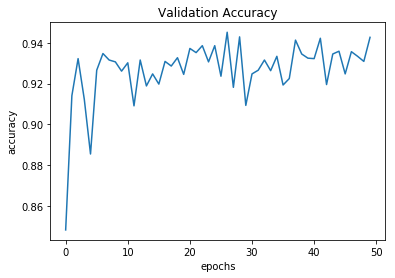

In [24]:
plt.figure()
plt.plot(val_accuracies)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Validation Accuracy")
plt.show()

### Test Accuracy

In [25]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.935


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [11]:
sign_names

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


['test_images/01_yield.jpg', 'test_images/02_stop.jpg', 'test_images/03_speedlimit30.jpg', 'test_images/04_slipperyroad.jpg', 'test_images/05_pedestriancrosswalk.jpg', 'test_images/06_entryprohibited.jpg', 'test_images/07_children.jpg', 'test_images/08_roughroad.jpg']


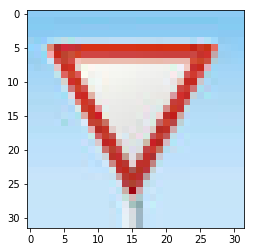

(32, 32, 3)


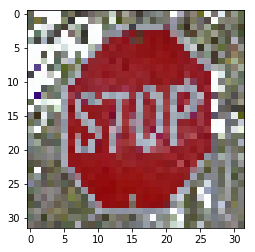

(32, 32, 3)


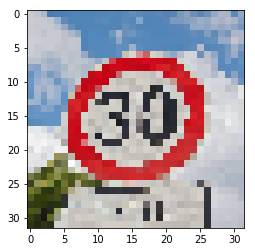

(32, 32, 3)


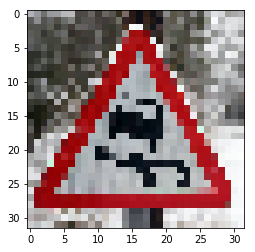

(32, 32, 3)


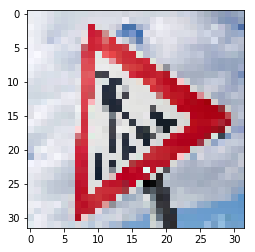

(32, 32, 3)


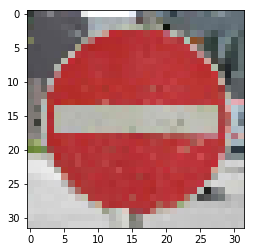

(32, 32, 3)


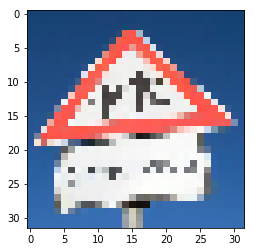

(32, 32, 3)


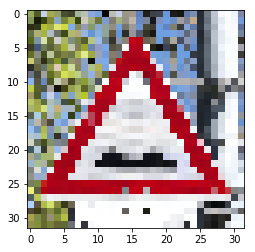

(32, 32, 3)


In [35]:
#import matplotlib.pyplot as plt
from glob import glob
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
test_images_fnames = glob('test_images/*.jpg')
test_images_fnames=sorted(test_images_fnames)
print(test_images_fnames)
test_images = []
for fname in test_images_fnames:
    img = cv2.imread(fname)
    img = cv2.resize(img,(32,32),cv2.INTER_AREA)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    print(img.shape)
    img=np.expand_dims(img,axis=0)
    test_images.append(img)

In [36]:
test_images = np.concatenate(test_images,axis=0)
test_images.shape

(8, 32, 32, 3)

In [37]:
test_labels = np.array([13,14,1,23,27,17,28,22])
test_labels.shape

(8,)

In [51]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(test_images, test_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.750


### Predict the Sign Type for Each Image

In [52]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
predict_operation = tf.argmax(tf.nn.softmax(logits,dim=0),1)

In [53]:
def predict(X):
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        predictions = sess.run(predict_operation, feed_dict={inputX: X, keep: 1.0})
        return predictions

In [57]:
predictions = predict(test_images)

INFO:tensorflow:Restoring parameters from ./lenet


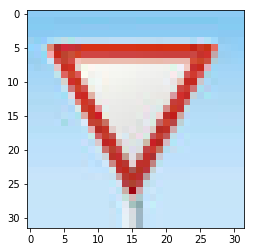

Predicted label: Yield   Expected label: Yield


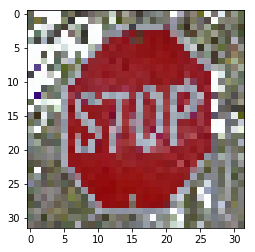

Predicted label: Stop   Expected label: Stop


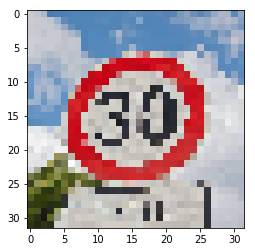

Predicted label: Speed limit (20km/h)   Expected label: Speed limit (30km/h)


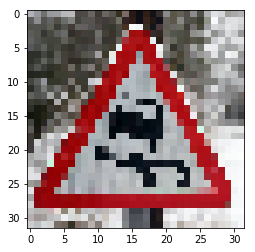

Predicted label: No passing   Expected label: Slippery road


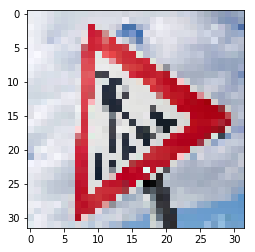

Predicted label: Pedestrians   Expected label: Pedestrians


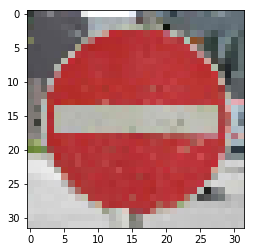

Predicted label: No entry   Expected label: No entry


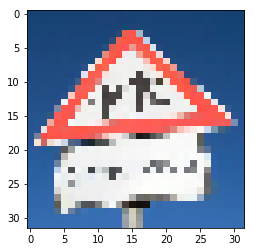

Predicted label: Priority road   Expected label: Children crossing


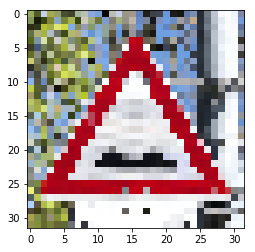

Predicted label: Bumpy road   Expected label: Bumpy road


In [58]:
for i,img in enumerate(test_images):
    plt.imshow(img)
    plt.show()
    current_prediction = predictions[i]
    sign_name = sign_names[sign_names["ClassId"]==current_prediction]["SignName"].values[0]
    expected_label = sign_names[sign_names["ClassId"]==test_labels[i]]["SignName"].values[0]
    print("Predicted label: {}   Expected label: {}".format(sign_name,expected_label))

### Analyze Performance

In [60]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

accuracy = np.sum(np.array([predictions==test_labels]).astype(int))/ len(test_labels) * 100
print("The accuracy is: {}%".format(accuracy))

The accuracy is: 62.5%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [81]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
softmax_operation = tf.nn.top_k(tf.nn.softmax(logits),k=5)

def predict_softmax(X):
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        predictions = sess.run(softmax_operation, feed_dict={inputX: X, keep: 1.0})
        return predictions       

In [82]:
softmax_top5_preds = predict_softmax(test_images)

INFO:tensorflow:Restoring parameters from ./lenet


In [83]:
print(softmax_top5_preds)

TopKV2(values=array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   4.04581663e-20,   6.26355256e-22,
          8.98105361e-24,   4.17933498e-24],
       [  9.99708593e-01,   2.91366712e-04,   1.99056480e-10,
          4.23423395e-13,   5.18531717e-14],
       [  9.85289276e-01,   1.24548897e-02,   1.73051085e-03,
          5.14217885e-04,   5.08502399e-06],
       [  9.84872043e-01,   8.69446993e-03,   4.89385193e-03,
          1.04581588e-03,   3.27995542e-04],
       [  1.00000000e+00,   1.78264602e-29,   6.41746388e-32,
          9.70600175e-35,   6.04569932e-37],
       [  6.78112447e-01,   2.33780012e-01,   3.26054133e-02,
          1.76098906e-02,   1.25404838e-02],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00]], dtype=float32), indices=array([[13,  0,  1,  2,  3],
       [14, 29, 22,  3,  0],
       [ 1,  0, 16, 21,  4],
       [23,  9, 21

In [84]:
predicted_top5_labels = softmax_top5_preds.indices
predicted_top5_probs = softmax_top5_preds.values

In [85]:
predicted_top5_labels

array([[13,  0,  1,  2,  3],
       [14, 29, 22,  3,  0],
       [ 1,  0, 16, 21,  4],
       [23,  9, 21, 16, 20],
       [19, 20, 28, 27, 26],
       [17, 28, 22, 14, 26],
       [26, 10,  7,  1,  0],
       [22,  0,  1,  2,  3]], dtype=int32)

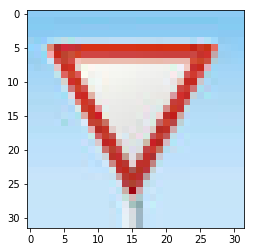

top 5 predictions:
Label Yield probability 100.00
Label Speed limit (20km/h) probability 0.00
Label Speed limit (30km/h) probability 0.00
Label Speed limit (50km/h) probability 0.00
Label Speed limit (60km/h) probability 0.00
Expected label: Yield


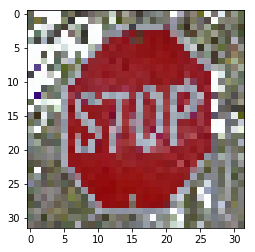

top 5 predictions:
Label Stop probability 100.00
Label Bicycles crossing probability 0.00
Label Bumpy road probability 0.00
Label Speed limit (60km/h) probability 0.00
Label Speed limit (20km/h) probability 0.00
Expected label: Stop


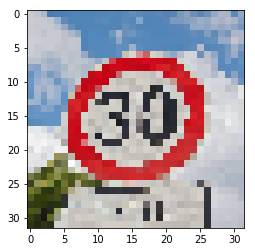

top 5 predictions:
Label Speed limit (30km/h) probability 99.97
Label Speed limit (20km/h) probability 0.03
Label Vehicles over 3.5 metric tons prohibited probability 0.00
Label Double curve probability 0.00
Label Speed limit (70km/h) probability 0.00
Expected label: Speed limit (30km/h)


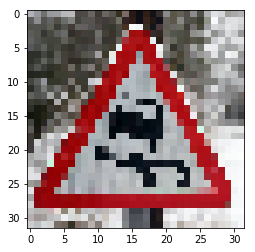

top 5 predictions:
Label Slippery road probability 98.53
Label No passing probability 1.25
Label Double curve probability 0.17
Label Vehicles over 3.5 metric tons prohibited probability 0.05
Label Dangerous curve to the right probability 0.00
Expected label: Slippery road


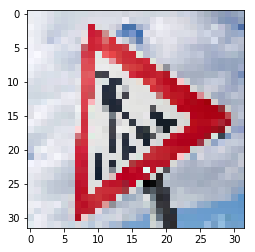

top 5 predictions:
Label Dangerous curve to the left probability 98.49
Label Dangerous curve to the right probability 0.87
Label Children crossing probability 0.49
Label Pedestrians probability 0.10
Label Traffic signals probability 0.03
Expected label: Pedestrians


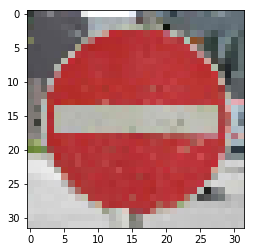

top 5 predictions:
Label No entry probability 100.00
Label Children crossing probability 0.00
Label Bumpy road probability 0.00
Label Stop probability 0.00
Label Traffic signals probability 0.00
Expected label: No entry


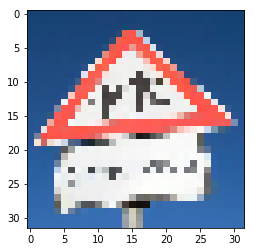

top 5 predictions:
Label Traffic signals probability 67.81
Label No passing for vehicles over 3.5 metric tons probability 23.38
Label Speed limit (100km/h) probability 3.26
Label Speed limit (30km/h) probability 1.76
Label Speed limit (20km/h) probability 1.25
Expected label: Children crossing


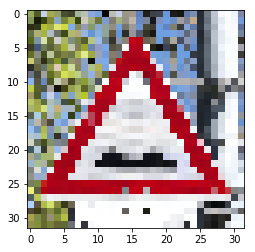

top 5 predictions:
Label Bumpy road probability 100.00
Label Speed limit (20km/h) probability 0.00
Label Speed limit (30km/h) probability 0.00
Label Speed limit (50km/h) probability 0.00
Label Speed limit (60km/h) probability 0.00
Expected label: Bumpy road


In [86]:
for i,img in enumerate(test_images):
    plt.imshow(img)
    plt.show()
    print("top 5 predictions:")
    
    for j in range(5):
        lab_idx = predicted_top5_labels[i,j]
        lab = sign_names[sign_names["ClassId"]==lab_idx]["SignName"].values[0]
        prob = predicted_top5_probs[i,j]*100
        print("Label {} probability {:.2f}".format(lab,prob))
    #top5preds = [sign_names[sign_names["ClassId"]==lb]["SignName"].values[0] for lb in predicted_top5_labels[i,:]]
    #print(top5preds)
    expected_label = sign_names[sign_names["ClassId"]==test_labels[i]]["SignName"].values[0]
    print("Expected label: {}".format(expected_label))

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")